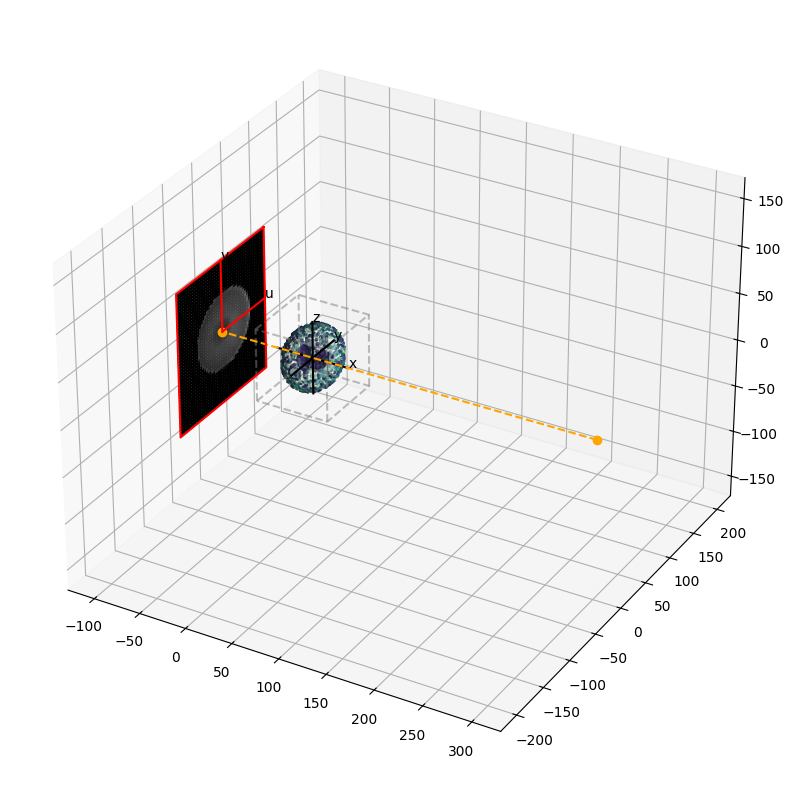

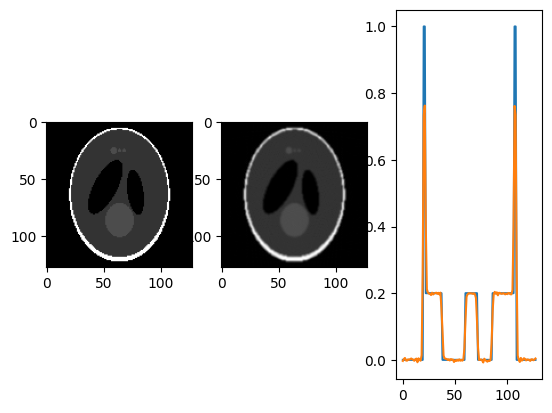

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pyCT

N = 128

obj = pyCT.getPhantom([N,N,N], np.float32)
params = pyCT.getParameters(None)
params.mode = True
params.object.size.set(obj.shape[-1::-1])
params.object.spacing.set([.6,.6,.6])
params.detector.size.set([192,192])
params.detector.spacing.set([.8,.8])
params.source.distance.source2origin = 300
params.source.distance.source2detector = 400
params.check()
params.set(np.linspace(0,np.pi*2,721)[:-1])

fig = pyCT.geometry.show(params, obj, scale=4)

proj = pyCT.project(obj, params, cuda=True)
recon = pyCT.reconstruct(proj, params, filter='ramp')
plt.figure()
plt.subplot(131)
plt.imshow(obj[64], 'gray')

plt.subplot(132)
plt.imshow(recon[64], 'gray', vmin=0, vmax=1)

plt.subplot(133)
plt.plot(obj[64,64])
plt.plot(recon[64,64])